In [277]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import time 
import datetime
import collections
# from plotnine import *
import seaborn as sns
import scipy.stats as stats

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


import xgboost as xgb
import lightgbm as lgb

In [3]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


import xgboost as xgb
import lightgbm as lgb

In [195]:
zillow = pd.read_csv('/content/drive/MyDrive/SWE project/DataStorage/datawithLessVIF.csv')

/content/drive/MyDrive/SWE project/DataStorage/dataBeforeFeatureEngineering.csv

In [199]:
newZill = pd.read_csv('/content/drive/MyDrive/SWE project/DataStorage/dataAfterImputation.csv')

In [202]:
newZill.shape

(88465, 35)

In [201]:
newZill.head()

,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet50,...,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock
0,0.0276,1.000000,2.0,3,4.0,2.0,1213.533333,1684.0,1684.0,1213.533333,...,0,1.0,1.000000,1959.0,1.266667,122754.0,360170.0,237416.0,6735.88,6.040000e+13
1,-0.1684,6.333333,3.5,4,5.6,3.5,1433.600000,2263.0,2263.0,1433.600000,...,0,1.0,1.066667,2014.0,1.533333,346458.0,585529.0,239071.0,10153.02,6.050000e+13
2,-0.0040,1.000000,3.0,2,4.0,3.0,1332.400000,2217.0,2217.0,1332.400000,...,0,1.0,1.000000,1940.0,1.266667,61994.0,119906.0,57912.0,11484.48,6.040000e+13
3,0.0218,1.000000,2.0,2,4.0,2.0,1360.866667,839.0,839.0,1360.866667,...,0,1.0,1.000000,1987.0,1.333333,171518.0,244880.0,73362.0,3048.74,6.040000e+13
4,-0.0050,8.466667,2.5,4,5.0,2.5,1188.533333,2283.0,2283.0,1188.533333,...,8,1.0,2.066667,1981.0,2.000000,169574.0,434551.0,264977.0,5488.96,6.060000e+13


In [203]:
Y = newZill['logerror']

In [204]:
Newziillow = newZill.copy()

In [205]:
Newziillow.shape

(88465, 35)

In [206]:
Newziillow.drop('logerror',axis = 1,inplace = True)

In [207]:
Newziillow.shape

(88465, 34)

In [ ]:
Newziillow['fullbathcnt']

# VIF test

In [247]:
Xs = newZill[[
             'taxamount','finishedsquarefeet12']]

In [248]:
Xs.shape

(88465, 2)

In [282]:
Xs.describe()

,taxamount,finishedsquarefeet12
count,88465.000000,88465.00000
mean,5947.789205,1736.06617
std,6598.208977,885.72517
min,49.080000,2.00000
25%,2887.120000,1187.00000
50%,4550.160000,1512.20000
75%,6888.670000,2030.00000
max,311064.070000,18577.00000


In [250]:
vif_data = pd.DataFrame()
vif_data["feature"] = Xs.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xs.values, i)
                          for i in range(len(Xs.columns))]
  
print(vif_data)

                feature       VIF
0             taxamount  2.799944
1  finishedsquarefeet12  2.799944


In [274]:
lm = ols("logerror ~ finishedsquarefeet12 + taxamount  ", data=newZill).fit()
# print regression results
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     229.9
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          2.58e-100
Time:                        21:58:13   Log-Likelihood:                 94475.
No. Observations:               88465   AIC:                        -1.889e+05
Df Residuals:                   88462   BIC:                        -1.889e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0016 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Regression

In [252]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [161]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [253]:
X= newZill[['finishedsquarefeet12','taxamount']]

In [254]:
X.describe()

,finishedsquarefeet12,taxamount
count,88465.00000,88465.000000
mean,1736.06617,5947.789205
std,885.72517,6598.208977
min,2.00000,49.080000
25%,1187.00000,2887.120000
50%,1512.20000,4550.160000
75%,2030.00000,6888.670000
max,18577.00000,311064.070000


In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [278]:
X_train.shape

(61925, 2)

In [256]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [257]:
from sklearn.metrics import mean_squared_error

In [258]:
mSE = mean_squared_error(y_test, y_pred) 

In [259]:
mSE

0.007008597037393361

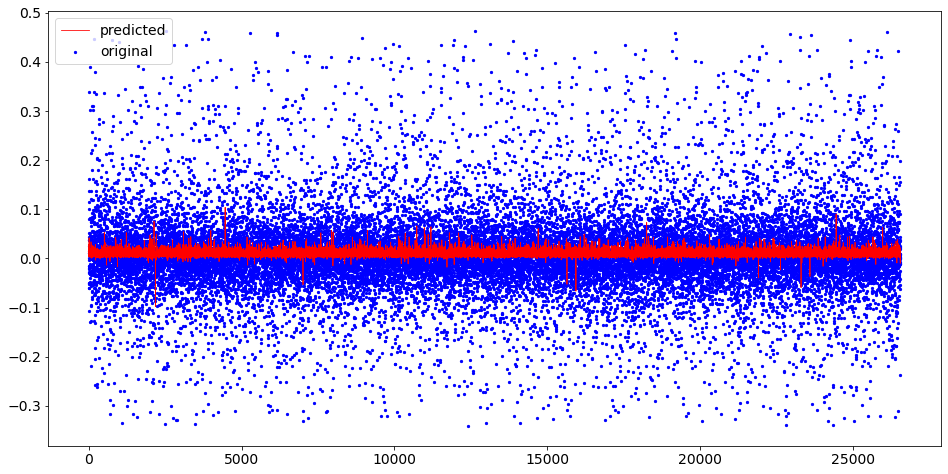

In [260]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Q-Q plot of predict log error

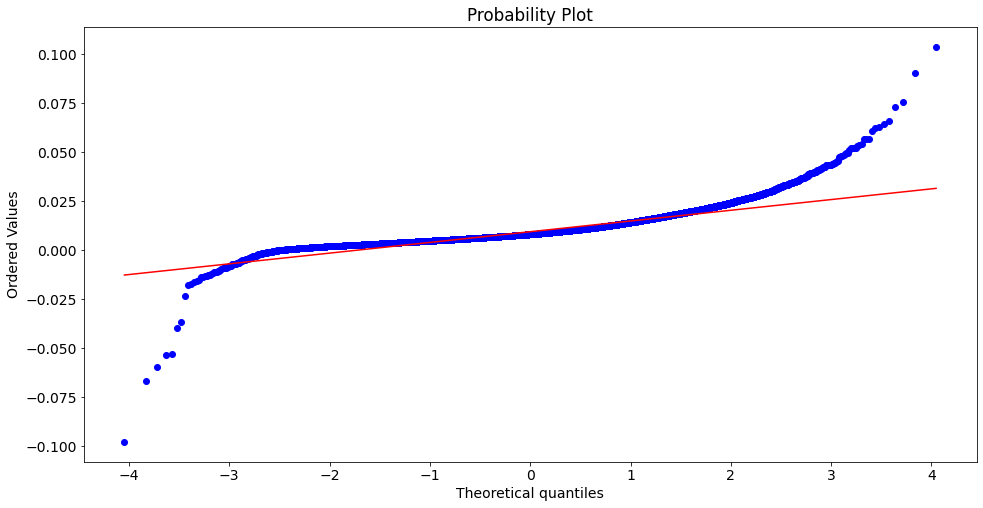

In [261]:
import numpy as np 
import pylab 
import scipy.stats as stats
 # Graph for predict log error
stats.probplot(y_pred, dist="norm", plot=pylab)
pylab.show()

The Q-Q plot for actual value(y _test)

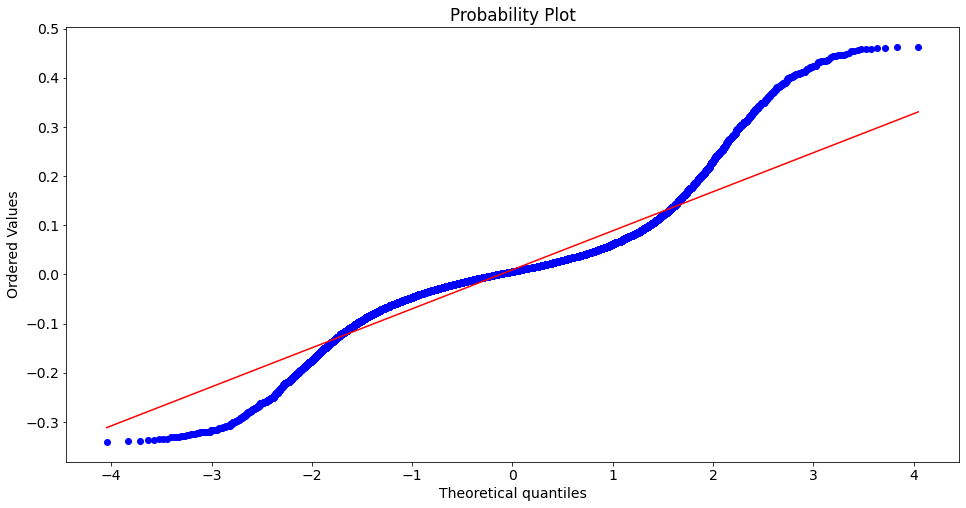

In [262]:
import numpy as np 
import pylab 
import scipy.stats as stats
 # Graph for predict log error
stats.probplot(y_test, dist="norm", plot=pylab)
pylab.show()

Distribution of y_test actual value

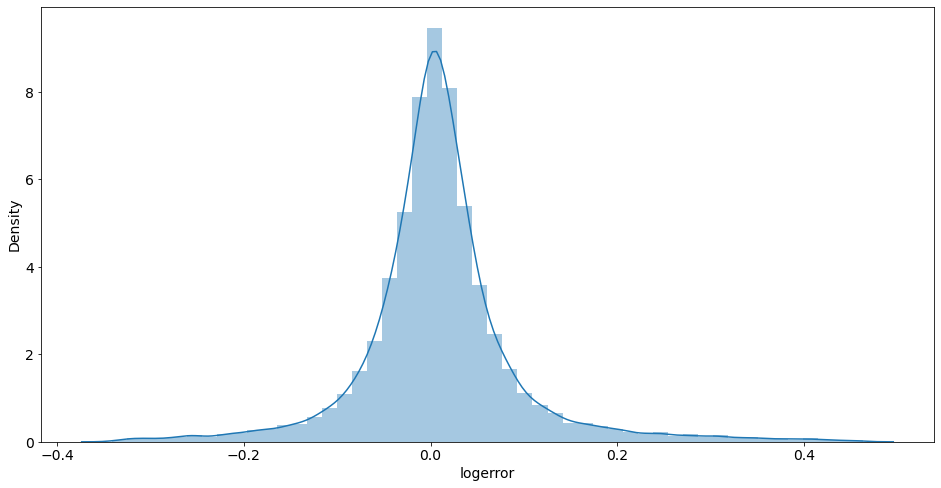

In [263]:
#traget variable
sns.distplot(y_test)
plt.show()

Distribution of y predict value

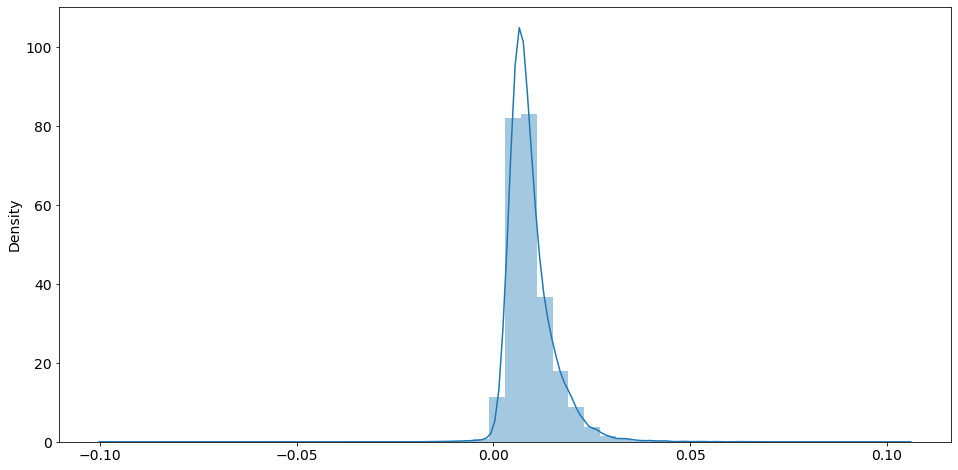

In [264]:
#traget variable
sns.distplot(y_pred)
plt.show()

R square

In [265]:
print('R2:',reg.score(X_test,y_test))

R2: 0.005784099286452404


Pairlot

In [266]:
PairDF = newZill[[
             'taxamount','finishedsquarefeet12','logerror']]

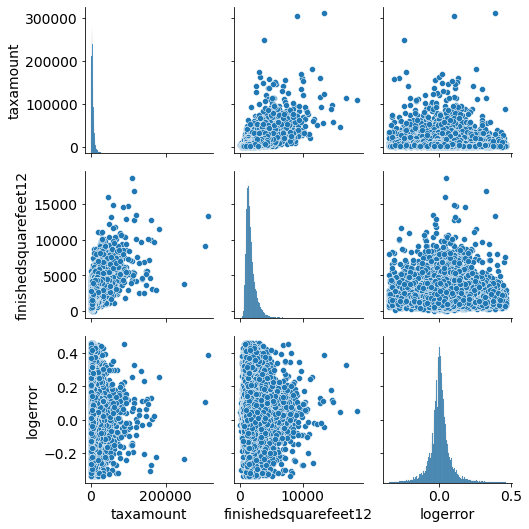

In [267]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(PairDF)

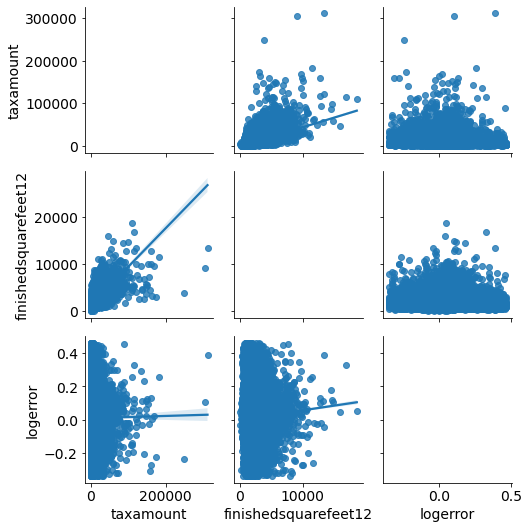

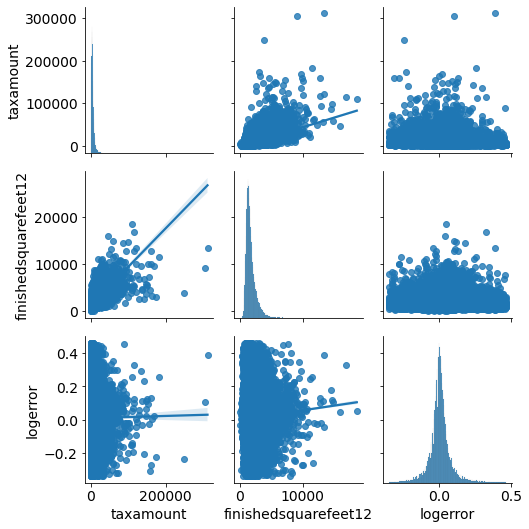

In [268]:
sns.pairplot(PairDF,kind='reg',diag_kind='ked')
sns.pairplot(PairDF,kind='reg',diag_kind='hist')

Corrleation Matrix

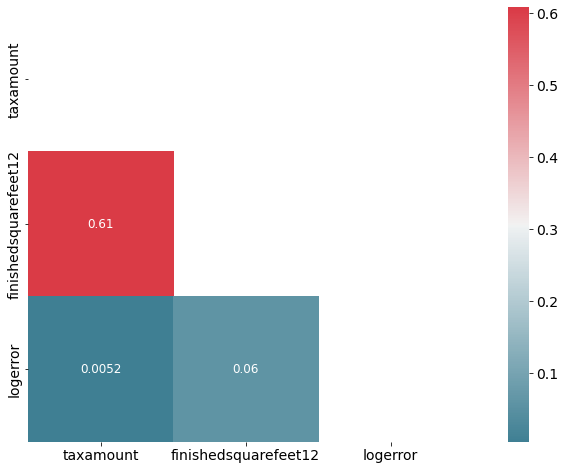

In [273]:
# Inspect correlation
# Calculate correlation using the default method ( "pearson")
corr = PairDF.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12})

Residuals vs fitted plot

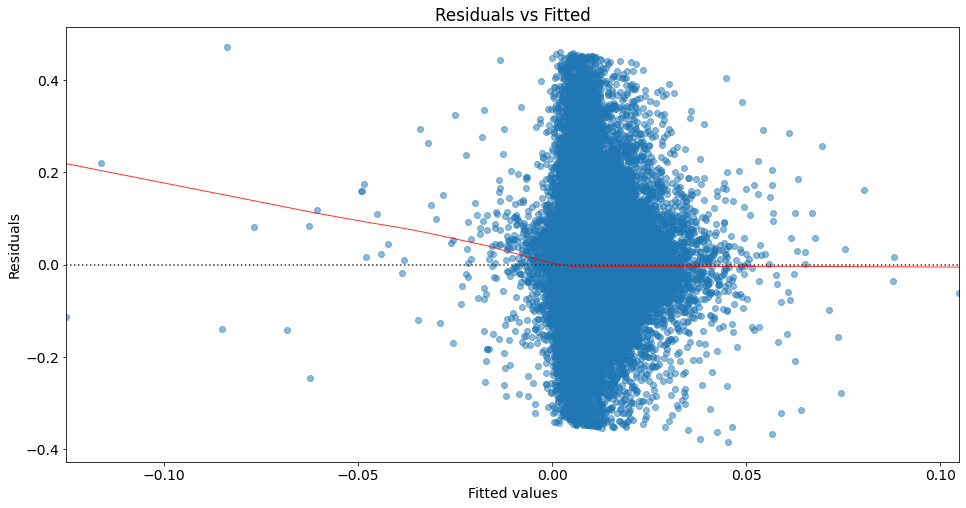

In [276]:
# fitted values
model_fitted_y = lm.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='logerror', data=PairDF, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

Each variable

In [279]:
PairDF.head()

,taxamount,finishedsquarefeet12,logerror
0,6735.88,1684.0,0.0276
1,10153.02,2263.0,-0.1684
2,11484.48,2217.0,-0.0040
3,3048.74,839.0,0.0218
4,5488.96,2283.0,-0.0050


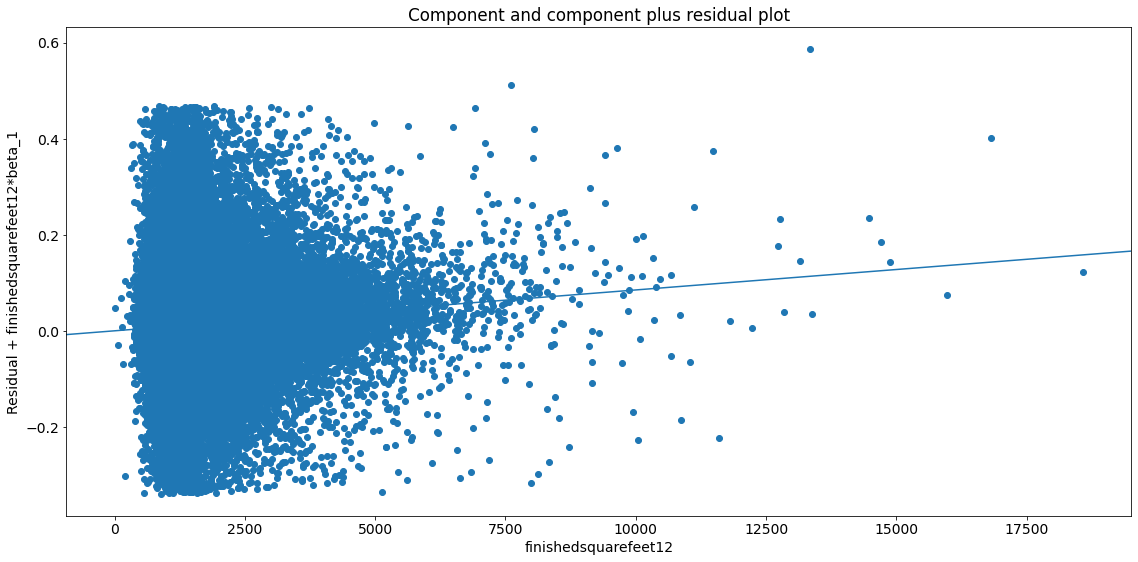

In [280]:
fig = sm.graphics.plot_ccpr(lm, "finishedsquarefeet12")
fig.tight_layout(pad=1.0)

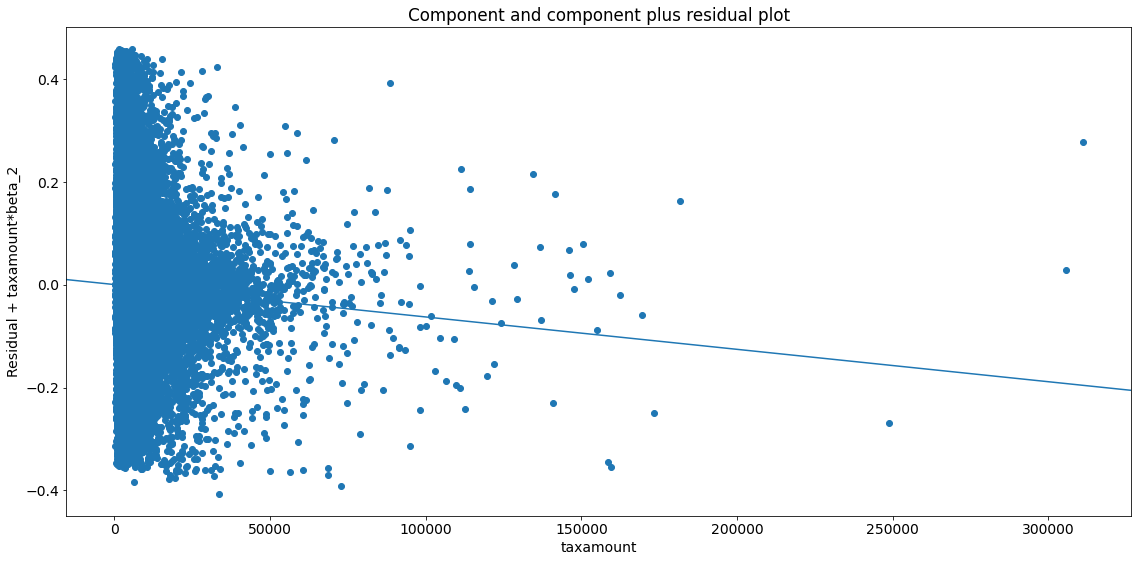

In [281]:
fig = sm.graphics.plot_ccpr(lm, "taxamount")
fig.tight_layout(pad=1.0)